# Projet "Capitals Learning"
## Classification d'images de capitales du monde

Groupe : Paul ANACLET, Nicolas CORMARY, Sylvain CROUZET, Théo DESPRATS

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from features.load_data import load_data
from features.get_classes import get_classes
from data.dispatch_data import dispatch_data
from visualization.plot_classes_repartition import plot_classes_repartition
from visualization.plot_training_analysis import plot_training_analysis

## Chargement des données

### Répartition des images

In [ ]:
# Répartition des images dans les différents datasets
pourcentageTrain = 70
pourcentageTest = 15
pourcentageValidation = 15

dispatch_data(pourcentageTrain, pourcentageTest, pourcentageValidation)


Images successfully dispatched.


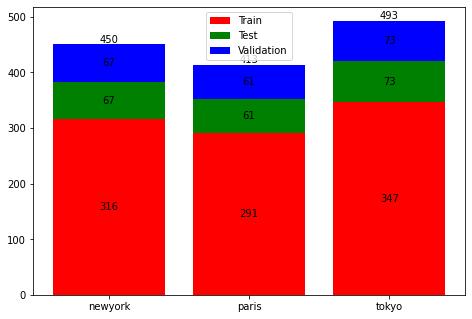

In [ ]:
plot_classes_repartition()

### Chargement des images

In [12]:
CLASSES = get_classes()
IMAGE_SIZE = 64

x_train, y_train = load_data(dataset='train', image_size=IMAGE_SIZE)
x_val, y_val = load_data(dataset='validation', image_size=IMAGE_SIZE)
x_test, y_test = load_data(dataset='test', image_size=IMAGE_SIZE)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

### Visualisation des images

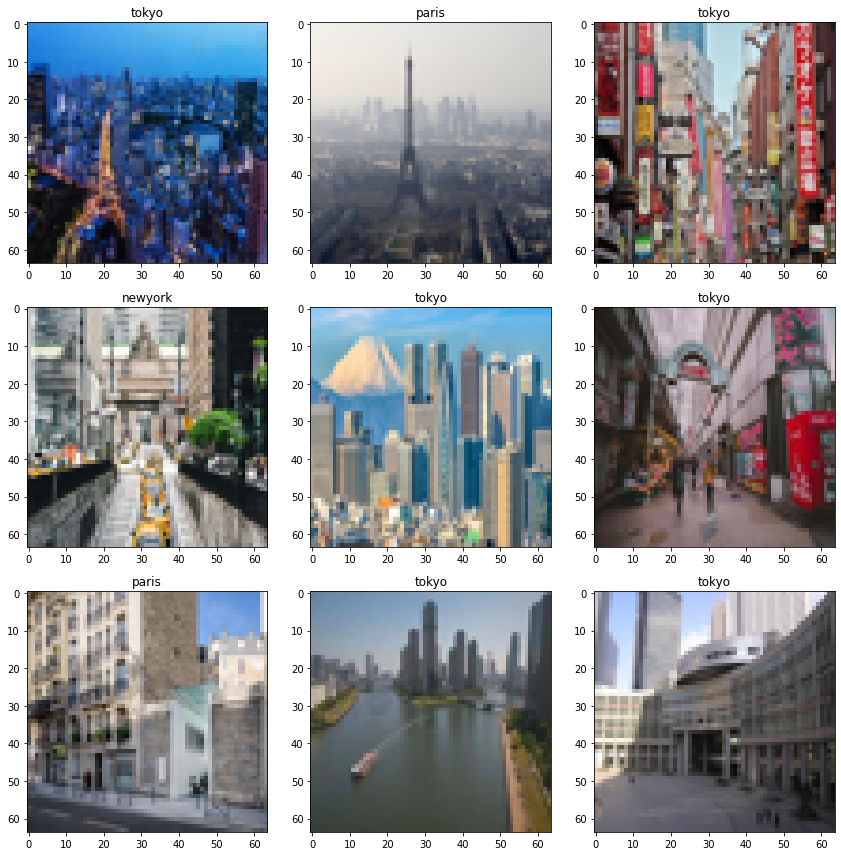

In [ ]:
%matplotlib inline

# Randomisation des indices et affichage de 9 images alétoires de la base d'apprentissage
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.title(CLASSES[int(y_train[indices[i]])])
    plt.imshow(x_train[indices[i]])
plt.tight_layout()
plt.show()

### Modele

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation="relu"))

model.add(Dense(len(CLASSES), activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 96)         0

### Entrainement

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=10)

Epoch 1/20
96/96 [==============================] - 4s 32ms/step - loss: 1.0836 - accuracy: 0.3679 - val_loss: 1.0517 - val_accuracy: 0.4627
Epoch 2/20
96/96 [==============================] - 3s 30ms/step - loss: 1.0391 - accuracy: 0.4444 - val_loss: 1.0619 - val_accuracy: 0.4826
Epoch 3/20
96/96 [==============================] - 3s 32ms/step - loss: 1.0211 - accuracy: 0.4790 - val_loss: 0.9795 - val_accuracy: 0.5274
Epoch 4/20
96/96 [==============================] - 3s 30ms/step - loss: 0.9983 - accuracy: 0.5000 - val_loss: 1.0575 - val_accuracy: 0.4677
Epoch 5/20
96/96 [==============================] - 3s 30ms/step - loss: 0.9661 - accuracy: 0.5147 - val_loss: 0.9910 - val_accuracy: 0.5224
Epoch 6/20
96/96 [==============================] - 3s 28ms/step - loss: 0.9204 - accuracy: 0.5556 - val_loss: 1.0112 - val_accuracy: 0.5075
Epoch 7/20
96/96 [==============================] - 3s 29ms/step - loss: 0.8571 - accuracy: 0.6080 - val_loss: 0.9790 - val_accuracy: 0.4726
Epoch 8/20
96

### Analyse des résultats du modèle

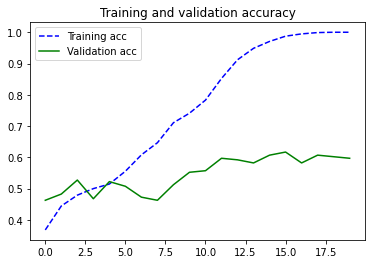

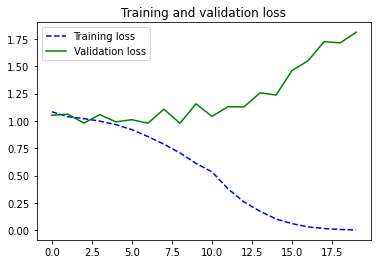

In [ ]:
plot_training_analysis(history)

#Modele avec VGG

In [13]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [14]:
train_features = conv_base.predict(x_train)
train_features = np.reshape(train_features,(train_features.shape[0],2*2*512))

val_features = conv_base.predict(x_val)
val_features = np.reshape(val_features,(val_features.shape[0],2*2*512))

In [17]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

model = Sequential()

model.add(Dense(256, activation='relu', input_dim=2*2*512))
model.add(Dense(len(CLASSES), activation="softmax"))


model.compile(optimizer=optimizers.Adam(learning_rate=3e-4),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.summary()


history = model.fit(train_features, y_train,
                    epochs=15,
                    batch_size=16,
                    validation_data=(val_features, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 525,315
Trainable params: 525,315
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
60/60 [==============================] - 1s 6ms/step - loss: 0.9897 - accuracy: 0.5126 - val_loss: 0.9314 - val_accuracy: 0.5522
Epoch 2/50
60/60 [==============================] - 0s 3ms/step - loss: 0.7405 - accuracy: 0.7034 - val_loss: 0.9407 - val_accuracy: 0.5473
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.6198 - accuracy: 0.7547 - val_loss: 0.8473 - val_accuracy: 0.6468
Epoch 4/50
60/60 [========

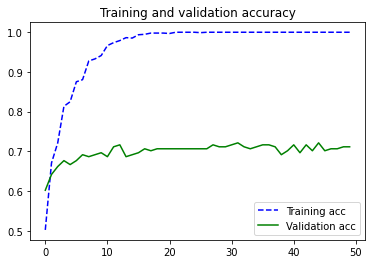

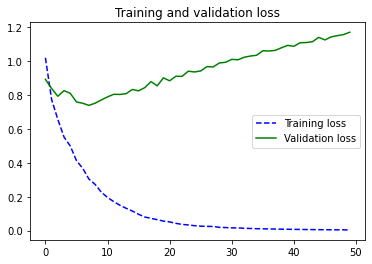

In [12]:
plot_training_analysis(history)

In [15]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(Dense(256, activation='relu', input_dim=2*2*512))
model.add(Dense(len(CLASSES), activation="softmax"))


conv_base.trainable = False
model.summary()

NameError: name 'models' is not defined

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10), 
                    validation_data=(x_val, y_val),
                    epochs=50,
                    )

#Problème pas assez d'époque (10 -> 50) et on avait mis metrics=['accurency']

# history = model.fit(train_features, y_train,
# epochs=50,
# batch_size=16,
# validation_data=(val_features, y_val))

NameError: name 'model' is not defined

In [7]:
plot_training_analysis(history)

NameError: name 'history' is not defined